In [80]:
#여러변수출력코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#모듈 import
import numpy as np
import pandas as pd

In [81]:
rainseason = pd.read_csv('C:/ds_work/data/rainseason.csv',encoding='cp949')
rainseason

,no,loc,start,end,rainseason,raindays,total
0,184,제주,1990-06-18,1990-07-17,30,19,445.0
1,185,고산,1990-06-18,1990-07-17,30,18,251.4
2,188,성산,1990-06-18,1990-07-17,30,12,411.1
3,189,서귀포,1990-06-18,1990-07-17,30,19,504.3
4,90,속초,1990-06-19,1990-07-27,39,30,412.3
...,...,...,...,...,...,...,...
2107,285,합천,2021-07-03,2021-07-19,17,11,226.4
2108,288,밀양,2021-07-03,2021-07-19,17,12,308.0
2109,289,산청,2021-07-03,2021-07-19,17,10,205.1
2110,294,거제,2021-07-03,2021-07-19,17,10,447.6


In [76]:
rainseason.isnull().sum()

지점번호     0
지점명      0
시작일      0
종료일      0
장마일수     0
강수일수     0
합계강수량    0
dtype: int64

In [77]:
rainseason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점번호    2112 non-null   int64  
 1   지점명     2112 non-null   object 
 2   시작일     2112 non-null   object 
 3   종료일     2112 non-null   object 
 4   장마일수    2112 non-null   int64  
 5   강수일수    2112 non-null   int64  
 6   합계강수량   2112 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 115.6+ KB


In [82]:
#연도를 시계열 객체로 변환
rainseason['year_time']=pd.to_datetime(rainseason['start'])
rainseason.head()
rainseason['end_time']=pd.to_datetime(rainseason['end'])
rainseason.head()

,no,loc,start,end,rainseason,raindays,total,year_time
0,184,제주,1990-06-18,1990-07-17,30,19,445.0,1990-06-18
1,185,고산,1990-06-18,1990-07-17,30,18,251.4,1990-06-18
2,188,성산,1990-06-18,1990-07-17,30,12,411.1,1990-06-18
3,189,서귀포,1990-06-18,1990-07-17,30,19,504.3,1990-06-18
4,90,속초,1990-06-19,1990-07-27,39,30,412.3,1990-06-19


,no,loc,start,end,rainseason,raindays,total,year_time,end_time
0,184,제주,1990-06-18,1990-07-17,30,19,445.0,1990-06-18,1990-07-17
1,185,고산,1990-06-18,1990-07-17,30,18,251.4,1990-06-18,1990-07-17
2,188,성산,1990-06-18,1990-07-17,30,12,411.1,1990-06-18,1990-07-17
3,189,서귀포,1990-06-18,1990-07-17,30,19,504.3,1990-06-18,1990-07-17
4,90,속초,1990-06-19,1990-07-27,39,30,412.3,1990-06-19,1990-07-27


In [90]:
#연, 월 분철
rainseason['year']=rainseason['year_time'].dt.year
rainseason['month']=rainseason['year_time'].dt.month
rainseason.head()

,no,loc,start,end,rainseason,raindays,total,year_time,end_time,year,month
0,184,제주,1990-06-18,1990-07-17,30,19,445.0,1990-06-18,1990-07-17,1990,6
1,185,고산,1990-06-18,1990-07-17,30,18,251.4,1990-06-18,1990-07-17,1990,6
2,188,성산,1990-06-18,1990-07-17,30,12,411.1,1990-06-18,1990-07-17,1990,6
3,189,서귀포,1990-06-18,1990-07-17,30,19,504.3,1990-06-18,1990-07-17,1990,6
4,90,속초,1990-06-19,1990-07-27,39,30,412.3,1990-06-19,1990-07-27,1990,6


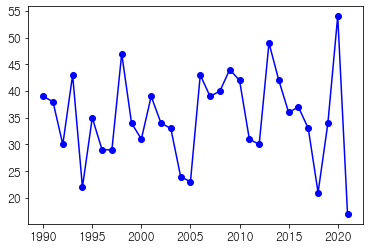

In [95]:
#연도별 최대 장마 일수 그룹핑
year_max=rainseason.groupby('year')['rainseason'].max()
year_max=year_max.reset_index()

#그래프 그리기
import matplotlib.pyplot as plt
plt.plot(year_max['year'],year_max['rainseason'], color='blue', marker='o')
plt.show()

Text(0.5, 1.0, '연도별 평균장마일수 변화')

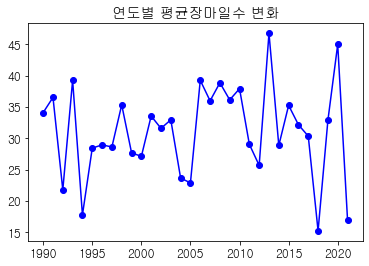

In [98]:
year_mean=rainseason.groupby('year')['rainseason'].mean()
year_mean=year_mean.reset_index()

import matplotlib.pyplot as plt
plt.plot(year_mean['year'],year_mean['rainseason'],color='blue',marker='o')
plt.title("연도별 평균장마일수 변화")
plt.show()

In [45]:
#장마일수
장마_rainseason=rainseason[rainseason['rainseason']>=0][['end_time','rainseason']]
장마_rainseason

,end_time,rainseason
0,2010-07-28,42
1,2010-07-28,42
2,2010-07-28,42
3,2010-07-28,42
4,2010-07-28,41
...,...,...
787,2021-07-19,17
788,2021-07-19,17
789,2021-07-19,17
790,2021-07-19,17


<BarContainer object of 792 artists>

Text(0.5, 1.0, '장마일수 변화')

Text(0.5, 0, '일자')

Text(0, 0.5, '장마일수')

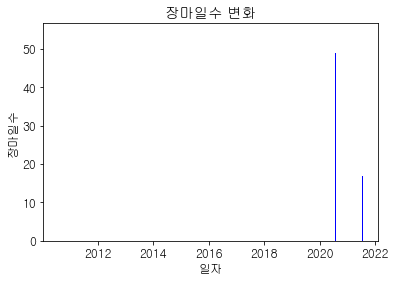

In [50]:

plt.rcParams["font.family"]='gulim'
plt.rcParams["font.size"]=12

plt.bar(장마_rainseason['end_time'], 장마_rainseason['rainseason'], color='blue')

plt.title("장마일수 변화")

plt.xlabel("일자")
plt.ylabel("장마일수")

plt.show()

<Figure size 720x432 with 0 Axes>

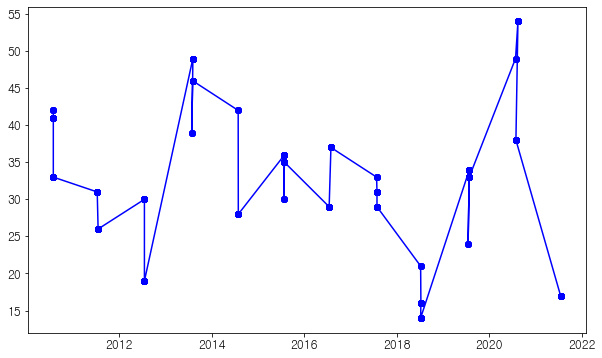

In [62]:
plt.figure(figsize=(10,6))
plt.plot(장마_rainseason['end_time'],장마_rainseason['rainseason'], color='blue', marker='o')
plt.show()

In [109]:
rainseason.to_csv('C:\\Users\\msi\\seaborn-data\\rain_season.csv')

In [110]:
heat = pd.read_csv('C:\ds_work\data\heat.csv',encoding = 'cp949')
heat

,year,1m,2m,3m,4m,5m,6m,7m,8m,9m,10m,11m,12m,year.sum,rank
0,1990.0,0.0,0.0,0.0,0.0,0.0,0.2,5.2,10.8,0.2,0.0,0.0,0.0,16.4,5.0
1,1991.0,0.0,0.0,0.0,0.0,0.1,0.3,1.0,2.2,0.1,0.0,0.0,0.0,3.7,29.0
2,1992.0,0.0,0.0,0.0,0.0,0.0,0.1,4.7,1.0,0.1,0.0,0.0,0.0,6.0,26.0
3,1993.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,33.0
4,1994.0,0.0,0.0,0.0,0.0,0.0,0.9,17.7,9.8,1.2,0.0,0.0,0.0,29.6,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


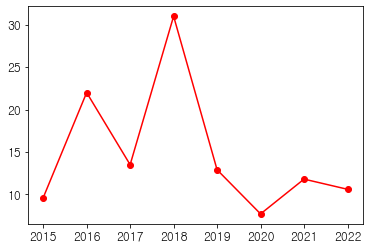

In [69]:
#폭염일수 그래프
plt.plot(heat['년'],heat['폭염일수'], color='red', marker='o')
plt.show()

<BarContainer object of 8 artists>

Text(0.5, 1.0, '평균최고기온')

Text(0.5, 0, '일자')

Text(0, 0.5, '평균최고기온')

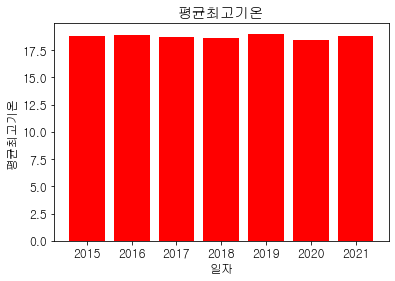

In [72]:
#평균 최고기온 그래프
plt.bar(heat['년'], heat['평균 최고기온'], color='red')

plt.title("평균최고기온")

plt.xlabel("일자")
plt.ylabel("평균최고기온")

plt.show()